<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

###### Importing required modules and libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

###### Reading CSV file

In [2]:
df = pd.read_csv('homeprices.csv')

In [3]:
print(df)

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


###### Getting Scatter Plot of data

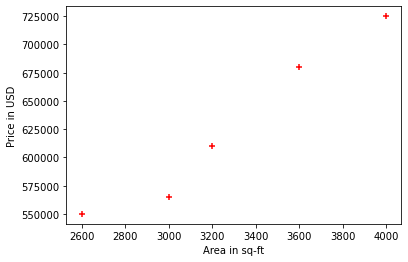

In [4]:
# using jupyter notebook magic for displaying plot inside ipynb
%matplotlib inline

plt.xlabel('Area in sq-ft')
plt.ylabel('Price in USD')
plt.scatter(df.area,df.price,color='red',marker='+')

###### Pandas Series of Area Values

In [5]:
area = df.drop('price',axis='columns')

In [6]:
print(area)

   area
0  2600
1  3000
2  3200
3  3600
4  4000


###### Pandas Series of Prices

In [7]:
price = df.drop('area',axis='columns')

In [8]:
print(price)

    price
0  550000
1  565000
2  610000
3  680000
4  725000


###### Creating Linear Regression Model

In [9]:
reg = linear_model.LinearRegression()

In [10]:
# Training/Fiting the model on the given data
reg.fit(area,price)

LinearRegression()

###### Linear Regression Model Plot

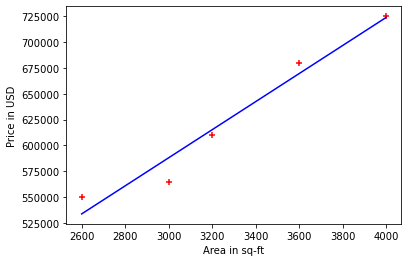

In [11]:
%matplotlib inline
plt.xlabel('Area in sq-ft')
plt.ylabel('Price in USD')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area, reg.predict(area),color='blue')

###### Predicting price of a home with area = 3300 sq ft

In [12]:
x = 3300
reg.predict([[x]])

array([[628715.75342466]])

###### Regression Coefficient i.e. value of 'm' in y=mx+b

In [13]:
m = reg.coef_

In [14]:
print(m)

[[135.78767123]]


###### Regression Intercept i.e. value of 'b' in y=mx+b

In [15]:
b = reg.intercept_

In [16]:
print(b)

[180616.43835616]


###### Verifing the results by putting values in y=mx+b 

In [17]:
y = m*x + b

In [18]:
print(y)

[[628715.75342466]]


#### Generate CSV file with list of home price predictions

###### Reading File

In [19]:
areas_list = pd.read_csv("areas.csv")

In [20]:
print(areas_list)

    area
0   1000
1   1500
2   2300
3   3540
4   4120
5   4560
6   5490
7   3460
8   4750
9   2300
10  9000
11  8600
12  7100


###### Predicting Prices

In [21]:
prices_list = reg.predict(areas_list)

In [22]:
print(prices_list)

[[ 316404.10958904]
 [ 384297.94520548]
 [ 492928.08219178]
 [ 661304.79452055]
 [ 740061.64383562]
 [ 799808.21917808]
 [ 926090.75342466]
 [ 650441.78082192]
 [ 825607.87671233]
 [ 492928.08219178]
 [1402705.47945205]
 [1348390.4109589 ]
 [1144708.90410959]]


###### Building a Dataframe by adding price in area series

In [23]:
areas_list['prices']=prices_list

In [24]:
print(areas_list)

    area        prices
0   1000  3.164041e+05
1   1500  3.842979e+05
2   2300  4.929281e+05
3   3540  6.613048e+05
4   4120  7.400616e+05
5   4560  7.998082e+05
6   5490  9.260908e+05
7   3460  6.504418e+05
8   4750  8.256079e+05
9   2300  4.929281e+05
10  9000  1.402705e+06
11  8600  1.348390e+06
12  7100  1.144709e+06


###### Saving the Dataframe in csv format

In [25]:
areas_list.to_csv("prediction.csv")